# Study of noise levels at different radii (and radiation levels) in the detector 
Two ring layout: inner ring has 2.7 hits per track, outer ring 1.8

In [1]:
import ROOT
from ROOT import TCanvas, TGraph, gROOT
import numpy as np
import time
import matplotlib.pyplot as plt
import time 
from array import array
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator
from ipynb.fs.defs.Simulation_Ruben import simulation, noise_generator, signal_generator, find_best_threshold


Welcome to JupyROOT 6.22/08


In [2]:
nr_of_channels = int(3.6 * 1e6) #number of channels on the HGTD
channels_per_module = int(15*30) #number of channels in each module of the detector
total_modules = int(nr_of_channels/channels_per_module) #number of modules
global_counter = 0 #global counter used for the pseudorandomgenerator in the next section

In [3]:
mu = 200 # Parameter for the number of interaction in a bunch crossing
bunch_crossings = 1000

large_window_factor = 8 #How many times the large window is bigger than the smaller one

"""exp number of particles on detector proportional to mu, try also non-linear relationship as in christian's plot """
expected_count_inner = (15*1e3/200)*mu #expected number of particles reaching the HGTD for mu=200, no more than 20k

# Ring parameters
ring_irradiation_ratio = 1.8/2.7

expected_count_outer = expected_count_inner*ring_irradiation_ratio

print("Expected count inner ring: %f" %expected_count_inner)
print("Expected count outer ring: %f" %expected_count_outer)
ratio_of_channels_to_sample = 0.5 # Choose according to how many channels, or which part of the detector, are hit

# threshold 
threshold = 25 #mV

# mpv peak voltage
mpv_peak_voltage = 100

Expected count inner ring: 15000.000000
Expected count outer ring: 10000.000000


In [4]:
start_time = time.time()
print ("Simulation Started!")
"""Simulation on inner ring"""
true_signal, estimated_signal, dev_per_BC = simulation (nr_of_channels, ratio_of_channels_to_sample, expected_count_inner, bunch_crossings, threshold, mpv_peak_voltage, mpv_peak_voltage, large_window_factor)

true_signal_sum = true_signal.sum()
if true_signal_sum == 0:
    deviation = 0
deviation = estimated_signal.sum() / true_signal_sum -1
total_deviation = deviation
#print("\nDeviation for threshold %f: %f" %(threshold, total_deviation[iteration]))

mean_value = (abs(np.mean(dev_per_BC)))
mean_value_with_std = (abs(np.mean(dev_per_BC))+np.std(dev_per_BC))
print ("Inner ring:\n%.2f threshold - Mean dev: %f" %(threshold, mean_value))
std_value = (np.std(dev_per_BC))
print ("                - Std: %f\n" %( std_value))

    
"""Simulation on outer ring"""
true_signal_outer, estimated_signal_outer, dev_per_BC_outer = simulation (nr_of_channels, ratio_of_channels_to_sample, expected_count_outer, bunch_crossings, threshold, mpv_peak_voltage, mpv_peak_voltage, large_window_factor)

true_signal_sum = true_signal.sum()
if true_signal_sum == 0:
    deviation = 0
deviation = abs( estimated_signal.sum() / true_signal_sum -1)
total_deviation_outer = deviation
#print("\nDeviation for threshold %f: %f" %(threshold, total_deviation[iteration]))

mean_value_outer = (abs(np.mean(dev_per_BC_outer)))
mean_value_with_std_outer = (abs(np.mean(dev_per_BC))+np.std(dev_per_BC_outer))
print ("Outer ring:\n%.2f threshold - Mean dev: %f" %(threshold, mean_value_outer))
std_value_outer = (np.std(dev_per_BC_outer))
print ("                - Std: %f\n" %(std_value_outer))

hours, rem = divmod(time.time()-start_time, 3600)
minutes, seconds = divmod(rem, 60)
print("Computation done!\nCPU time: %d hours, %d minutes and %d seconds" %(hours, minutes,seconds))

Simulation Started!
Inner ring:
25.00 threshold - Mean dev: 0.000002
                - Std: 0.000078

Outer ring:
25.00 threshold - Mean dev: 0.000004
                - Std: 0.000102

Computation done!
CPU time: 0 hours, 0 minutes and 5 seconds


In [5]:
# c = TCanvas( 'c1', 'Graph', 200, 10, 700, 500 )

# # x-axis
# x = np.array(list(range(0, bunch_crossings)))

# # Multiple graphs
# g1 = TGraph(bunch_crossings, x.astype(np.double), total_deviation.astype(np.double))
# g1.SetLineColor(2)
# g1.SetTitle("Inner detector ring")

# g2 = TGraph(bunch_crossings,  x.astype(np.double),total_deviation_outer.astype(np.double))
# g2.SetLineColor(3)
# g2.SetTitle("Outer detector ring")

# mg = ROOT.TMultiGraph()
# mg.Add(g1);
# mg.Add(g2);
# mg.Draw("ALP");

# c.BuildLegend()
# c.Update();
# c.Modified();
# c.Draw()



In [6]:
print(dev_per_BC)

[ 1.23047632e-05  1.60428741e-06  6.94200100e-05  1.26546889e-05
 -4.48825335e-05 -5.38096305e-05 -5.41226701e-05  1.46122217e-04
  6.95722208e-05  2.15478827e-05  3.52171211e-06  1.19464563e-05
  6.94187207e-05 -1.39871146e-04  5.08401515e-05  7.91057384e-05
  2.49011881e-06  1.17557027e-05  6.96152672e-05 -1.11363816e-04
 -3.92883130e-04 -1.39673389e-04  2.18211097e-05  1.55242067e-04
  2.75465503e-06  8.86139110e-05  8.86139110e-05 -4.53115813e-05
  8.86139110e-05  8.86139110e-05 -5.61495190e-06 -4.57433959e-05
  1.23505884e-05 -5.30751488e-05  8.86139110e-05  1.45602264e-04
  2.15928271e-05 -4.38306147e-05  2.17272996e-05  5.99328748e-05
  1.32556717e-05  7.88336672e-05 -7.20307502e-05  8.86139110e-05
 -5.42463669e-05  7.90221150e-05  2.11997813e-05  1.25485300e-05
  1.24268416e-05  8.86139110e-05 -7.26815222e-05  6.95264291e-05
  1.45995182e-04  2.19324459e-05  1.15380181e-05  2.14623221e-05
  2.15883354e-05  2.17496593e-05 -4.42882303e-05  8.86139110e-05
  6.95480804e-05 -4.68443

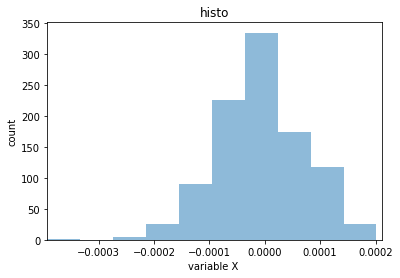

In [12]:
bins = np.arange(-0.5, 0.5, 0.01) # fixed bin size

plt.xlim([min(dev_per_BC), max(dev_per_BC)+1e-5])
plt.hist(dev_per_BC, alpha=0.5)
plt.title('histo')
plt.xlabel('variable X ')
plt.ylabel('count')

plt.show()